In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns 
from matplotlib import gridspec
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = (8, 6);

warnings.filterwarnings("ignore")

In [2]:
#read the data

data_path = '/kaggle/input/ccdata/CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
df.head(8)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12

### See if the data contain nan values or not 

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### We have only Two columns contains NAN Values `MINIMUM_PAYMENTS ` and `CREDIT_LIMIT`

### Check if the data contains Duplicates or not ?

In [8]:
df.duplicated().sum()

0

### Summary Statistics about the data 

In [9]:
df.describe().T #Transpose

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

###  the column of interest :-
` BALANCE `, `BALANCE_FREQUENCY` , `PURCHASES` ,`ONEOFF_PURCHASES` , `INSTALLMENTS_PURCHASES` , `CASH_ADVANCE` , `PURCHASES_FREQUENCY` , `ONEOFF_PURCHASES_FREQUENCY` , `PURCHASES_INSTALLMENTS_FREQUENCY` , `CASH_ADVANCE_FREQUENCY` , `CASH_ADVANCE_TRX` , `PURCHASES_TRX` , `CREDIT_LIMIT`, `PAYMENTS` ,`MINIMUM_PAYMENTS` , `PRC_FULL_PAYMENT` 

In [10]:
important_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 
final_data = df[important_columns].dropna()

In [11]:
corr_matrix = final_data.corr()

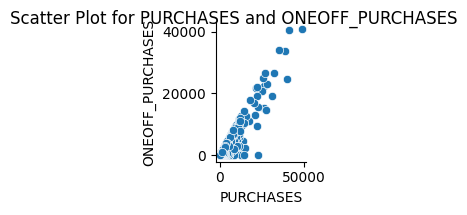

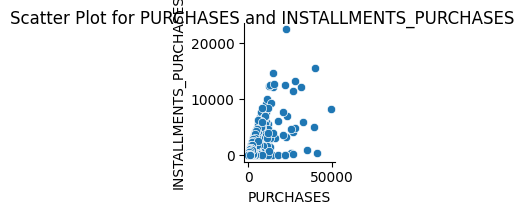

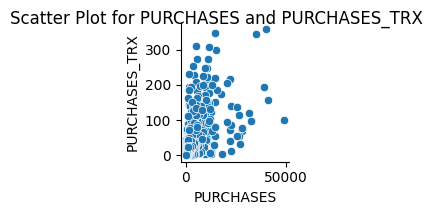

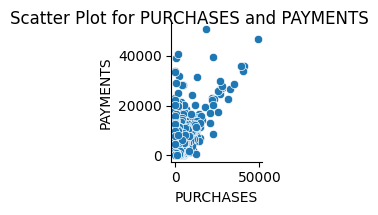

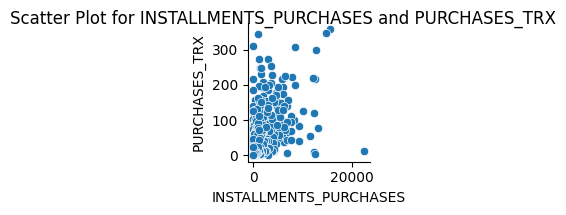

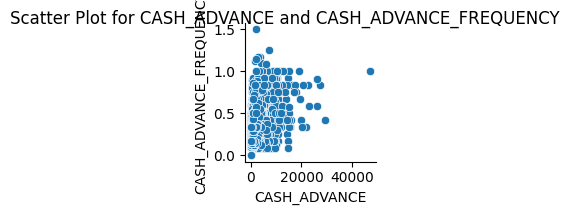

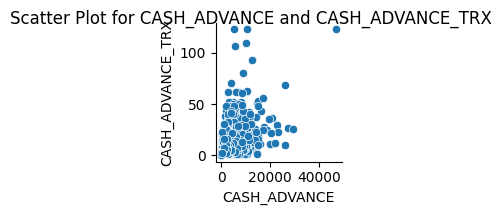

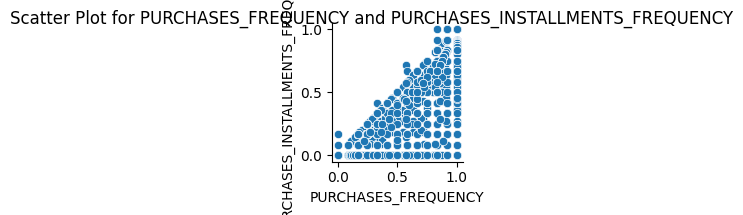

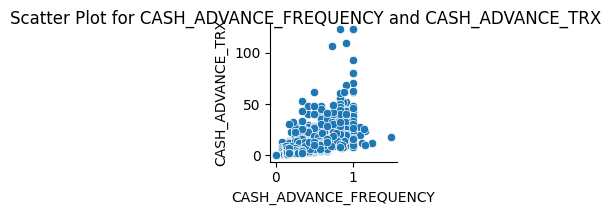

In [12]:
# Find pairs of columns with correlation greater than 0.60or less than -0.6
high_corr_pairs = []
checked = set() 
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# scatter plot matrix for the selected pairs
for pair in high_corr_pairs:
    sns.pairplot(final_data, height=2, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.02)
    plt.show()


### Identified Correlations among Key Features

1. **PURCHASES and ONEOFF_PURCHASES:**
   - **Insight:** These columns exhibit a meaningful correlation, suggesting a strong connection between general purchases and one-off purchases. Customers who engage in overall purchasing tend to make significant one-time transactions as well.

2. **PURCHASES and INSTALLMENTS_PURCHASES:**
   - **Insight:** A notable correlation exists between PURCHASES and INSTALLMENTS_PURCHASES, indicating a coherent link between overall purchases and those made in installments. This suggests that customers who make frequent purchases also leverage the option to split their payments.

3. **PURCHASES and PURCHASES_TRX:**
   - **Insight:** The correlation observed between PURCHASES and PURCHASES_TRX implies a relationship between the total purchase amount and the number of individual purchase transactions. This connection may reflect varying purchasing behaviors among customers.

4. **PURCHASES and PAYMENTS:**
   - **Insight:** A discernible correlation is found between PURCHASES and PAYMENTS, highlighting a connection between a customer's purchasing activity and the subsequent payment amounts. This correlation signifies the financial dynamics of customers managing their credit card balances.

5. **INSTALLMENTS_PURCHASES and PURCHASES_TRX:**
   - **Insight:** These columns exhibit a meaningful correlation, suggesting a connection between purchases made in installments and the number of individual purchase transactions. Customers opting for installment payments may engage in more frequent transactions.

6. **CASH_ADVANCE and CASH_ADVANCE_FREQUENCY:**
   - **Insight:** A notable correlation between CASH_ADVANCE and CASH_ADVANCE_FREQUENCY indicates a relationship between the amount of cash advances taken and the frequency at which customers utilize this option. This correlation sheds light on the financial habits of customers seeking immediate liquidity.

7. **CASH_ADVANCE and CASH_ADVANCE_TRX:**
   - **Insight:** The observed correlation suggests a connection between the total amount of cash advances and the number of transactions involving cash advances. This may indicate that customers who use cash advances do so consistently, with transaction frequency playing a role.

8. **PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY:**
   - **Insight:** A meaningful correlation exists between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY, indicating a relationship between the frequency of general purchases and the frequency of purchases made in installments. This insight provides a glimpse into customer preferences regarding the timing and nature of their purchases.

These identified correlations offer valuable insights into the interrelated nature of key features in the dataset, providing a foundation for understanding customer behaviors and financial patterns.


# Now we Want to See the different distribuation for all columns 

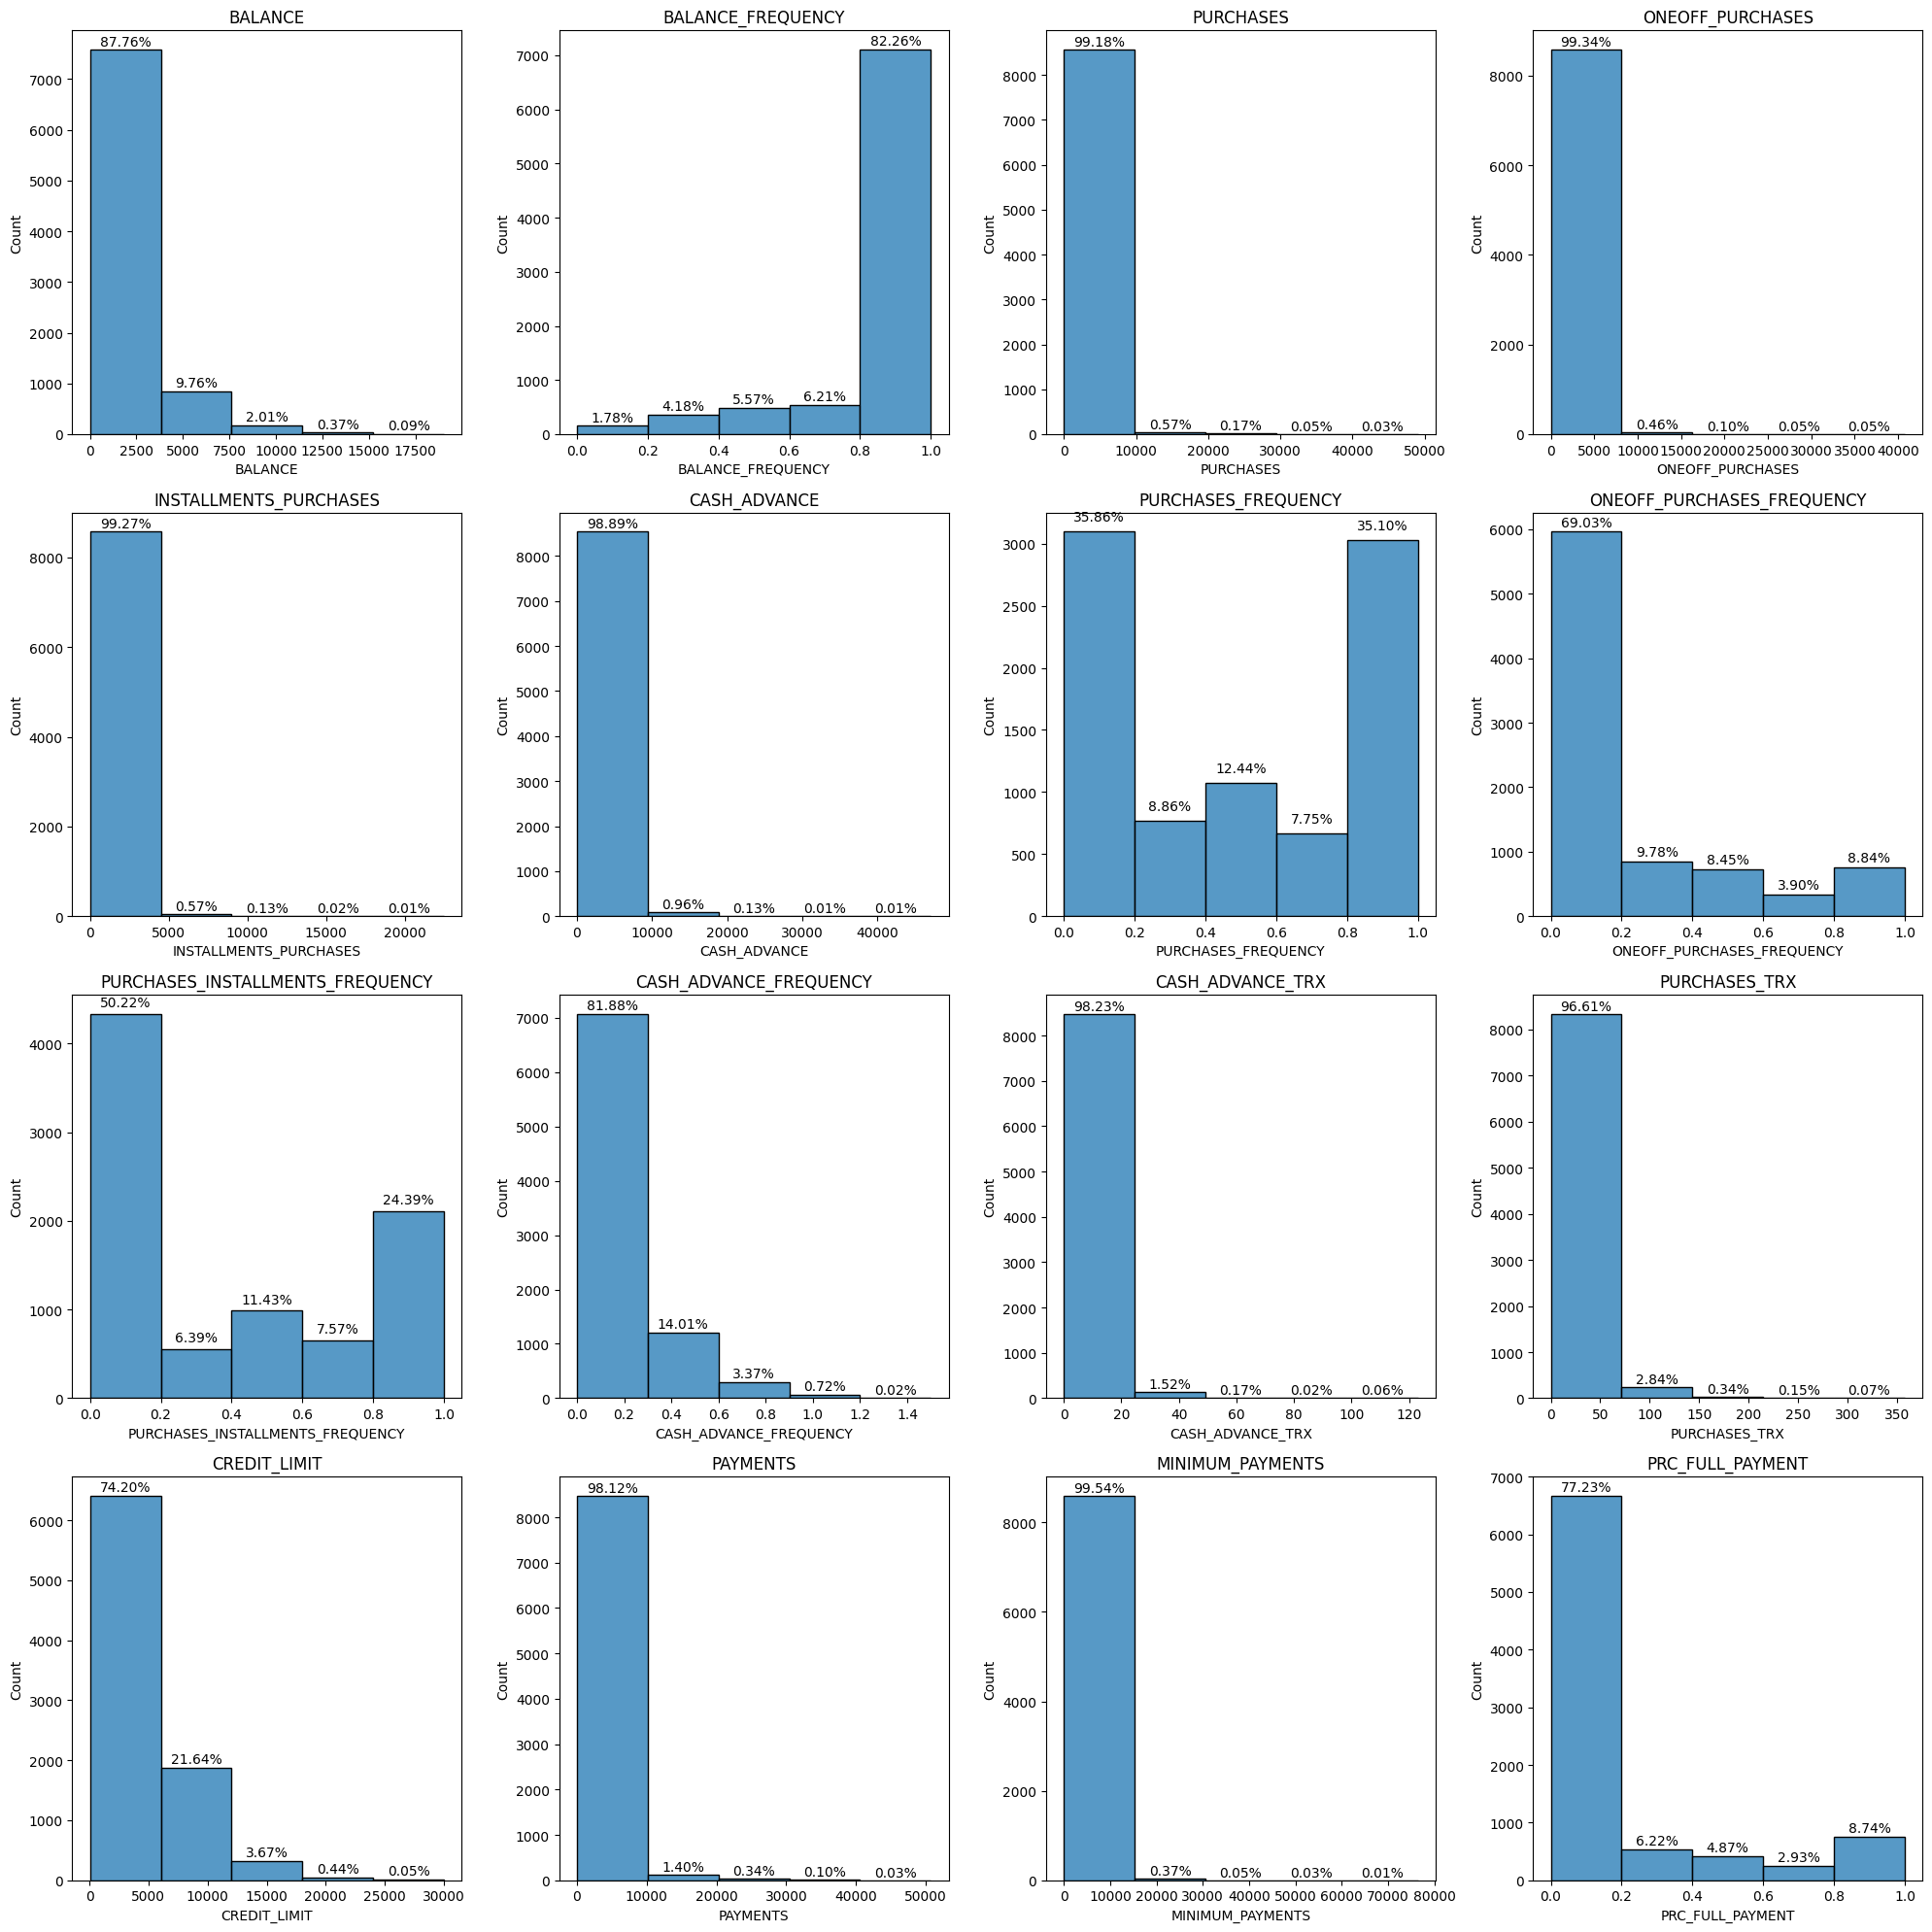

In [13]:
# Histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(important_columns):
    row, col_num = divmod(i, 4)
    sns.histplot(final_data[col], bins=5, kde=False, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)
    
    # percentage
    total = len(final_data[col])
    for p in axes[row, col_num].patches:
        height = p.get_height()
        axes[row, col_num].text(p.get_x() + p.get_width() / 2.,
                                height + 0.01 * total,
                                '{:.2%}'.format(height / total),
                                ha="center")

plt.tight_layout()
plt.show()

# Some Insights form the above Graphs :-

### Account Balances:
- **Insight:** 87.76% of customers maintain account balances not exceeding $3750, indicating a trend towards conservative spending habits and financial prudence.

### Balance Update Frequency:
- **Insight:** Most customers have their account balances updated frequently, reflecting a proactive approach to monitoring financial status and staying informed about credit card activity.

### Purchase Behavior:
- **Insight:** 99% of customers make purchases, and the highest single purchase is under $10,000, suggesting a preference for moderate spending habits.

### Installment Purchases:
- **Insight:** Most customers (99%) prefer purchases made in installments, with the majority opting for purchases under $5000, indicating a preference for budget-friendly spending and manageable repayment plans.

### Purchase Frequency:
- **Insight:** 35% of customers make purchases frequently, while an equal percentage make purchases infrequently, demonstrating varied spending habits among customers.

### One-Go Purchases:
- **Insight:** The majority of customers (78%) do not prefer to make purchases frequently in one-go, suggesting a preference for smaller, more frequent transactions.

### Installment Purchases:
- **Insight:** 56% of customers do not prefer to make purchases with installments frequently, while 24% prefer frequent installment purchases, reflecting a diverse range of preferences among customers regarding payment methods.

### Cash Advance Usage:
- **Insight:** 95% of customers do not prefer to pay frequently in cash advance, indicating a general avoidance of cash advance transactions.
- **Note:** However, 99% of customers have made a number of transactions with cash in advance, with transaction volumes ranging from 0 to 50, suggesting occasional use or emergency financial needs.

### Purchase Transactions:
- **Insight:** 96% of customers have a number of purchase transactions made, with volumes ranging from 0 to 70, indicating varying levels of purchasing activity among customers.

### Credit Card Limits:
- **Insight:** 74% of customers have credit card limits not exceeding $6000, indicating a preference for moderate credit limits among the majority of customers.

### Payment Behavior:
- **Insight:** The total amount of payments made by the user is under $10,000 for 98% of customers, suggesting responsible credit management practices and conservative payment behavior.
- **Note:** Most customers have minimum payments under $15,000, indicating a tendency towards managing credit card debt within manageable limits.
- **Remark:** 74% of customers do not prefer to pay the full payment, reflecting a preference for partial payments or revolving credit utilization among the majority of customers.


## 3. <a name="3">Data preprocessing</a>



In [15]:
#make a copy for the original dataset
df_copy=df.copy()

In [16]:
df_copy.dropna(inplace=True)

In [17]:
# Ensure no nan values ..
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Now I WILL Drop Custmer ID and high high correlated columns 

In [18]:
df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

# K-means

### Firstly elbow method to determine the best K 

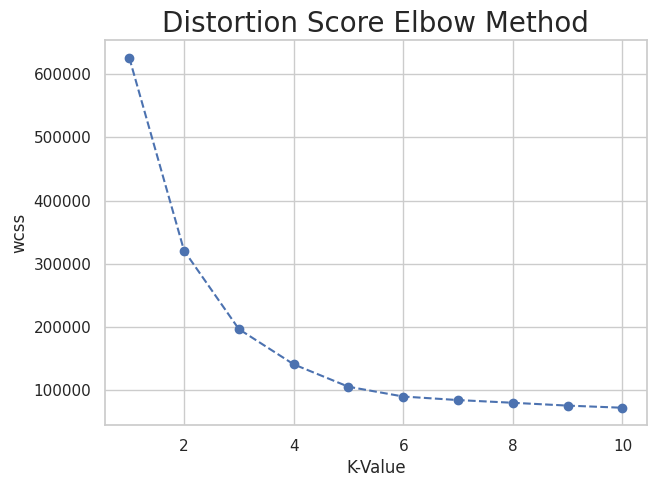

In [22]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_copy)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

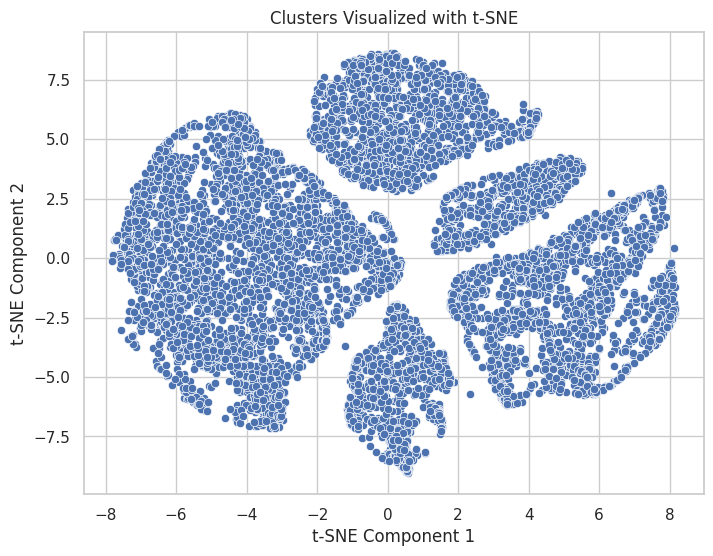

In [23]:
# Apply t-SNE to reduce dimensions to 2 for visualization
#Dimensionality reduction is a technique used to reduce the number of features or dimensions in a dataset while preserving 
# the most important information. It's a crucial step in data preprocessing, especially when dealing with high-dimensional data.
#
# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used to visualize 
# high-dimensional data in a lower-dimensional space, typically 2D or 3D.
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

#  AS WE see the best `K` is will be a `Five`from Elbow method and TSNE ensure that..

## Now  I will write the class for K-means I Built before and Compare it with the Sklearn kmeans class

In [24]:
class K_means:
    def __init__(self, K):
        self.K = K
        self.centroids = None

    def findClosestCentroids(self, X):
        m, _ = X.shape
        closest_centroids = np.zeros(m, dtype=int)

        for i in range(m):
            distances = np.linalg.norm(X.iloc[i].values - self.centroids, axis=1)
            closest_centroids[i] = np.argmin(distances)

        return closest_centroids

    def computeCentroids(self, X, idx):
        centroids = X.groupby(idx).mean().values

        return centroids

    def kMeansInitCentroids(self, X):
        idx = np.random.choice(X.index, self.K, replace=False)
        centroids = X.loc[idx].values

        return centroids

    def KMeans_alg(self, X, initial_centroids=None):
        if initial_centroids is None:
            self.centroids = self.kMeansInitCentroids(X)
        else:
            self.centroids = initial_centroids
        
        idx = self.findClosestCentroids(X)
        self.centroids = self.computeCentroids(X, idx)

        return self.centroids, idx

    def fit_predict(self, X):
        return self.findClosestCentroids(X)


### Here get the predication using my class I built before 

In [25]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans_amgad = K_means(n_clusters)

# KMeans
centroids, idx = kmeans_amgad.KMeans_alg(df_copy)

# fit
predictions = kmeans_amgad.fit_predict(df_copy)

In [26]:
predictions

array([0, 1, 2, ..., 0, 4, 3])

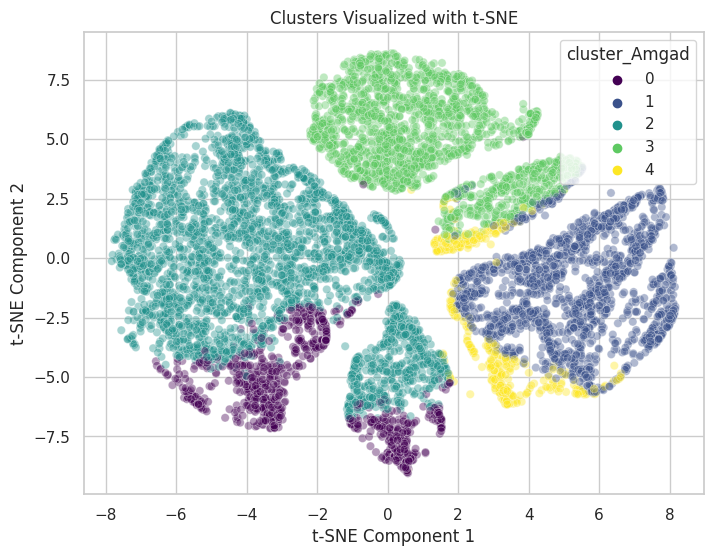

In [27]:
# Add the cluster information to the reduced data
df_tsne['cluster_Amgad'] = predictions

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster_Amgad', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

### Below using sklearn class 

In [28]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(df_copy)

KMeans(n_clusters=5)

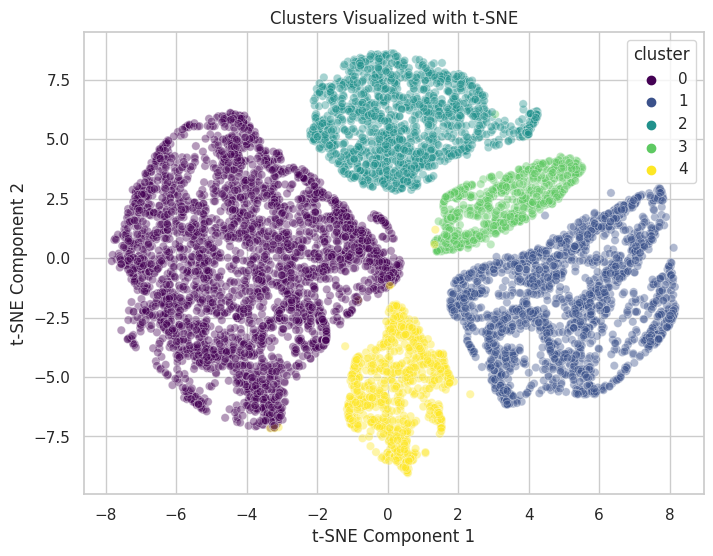

In [29]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

**Comparing Custom K-Means Implementation with scikit-learn K-Means**

In the process of implementing the K-Means clustering algorithm, a custom class (`K_means`) was created. However, it is observed that the performance of scikit-learn's built-in K-Means implementation surpasses the custom implementation. This difference in performance can be attributed to various factors, including additional optimizations and fine-tuning present in the scikit-learn K-Means implementation.


1. **Optimized Parameters:**
   - The scikit-learn K-Means implementation is designed to work efficiently with various datasets by optimizing its internal parameters and configurations.
   - Custom implementations may lack some of these optimizations, leading to differences in performance.

2. **Parallelization:**
   - Scikit-learn K-Means can leverage parallel processing for faster computations, especially on multicore systems.
   - Custom implementations may not incorporate parallelization, potentially resulting in slower execution.

3. **Convergence Strategies:**
   - Scikit-learn's K-Means benefits from advanced combining strategies that enhance the algorithm's speed and accuracy during clustering.
   - Custom implementations might not employ the same sophisticated combining techniques, affecting overall performance.

4. **Scalability:**
   - Scikit-learn's K-Means is designed to handle large datasets efficiently.
   - Custom implementations may face flexibility challenges, impacting their ability to process extensive data.


# Hierarchial Clustering

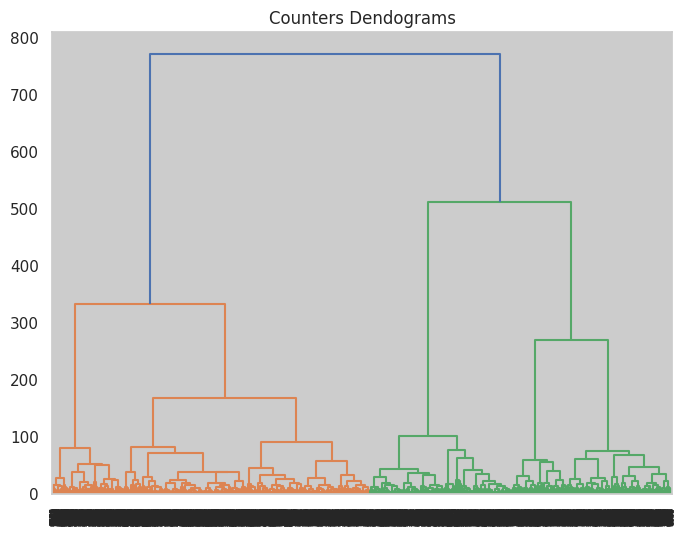

In [30]:
import scipy.cluster.hierarchy as shc
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy ,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

# AgglomerativeClustering

In [31]:
# Number of clusters (K)
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy)

AgglomerativeClustering(n_clusters=5)

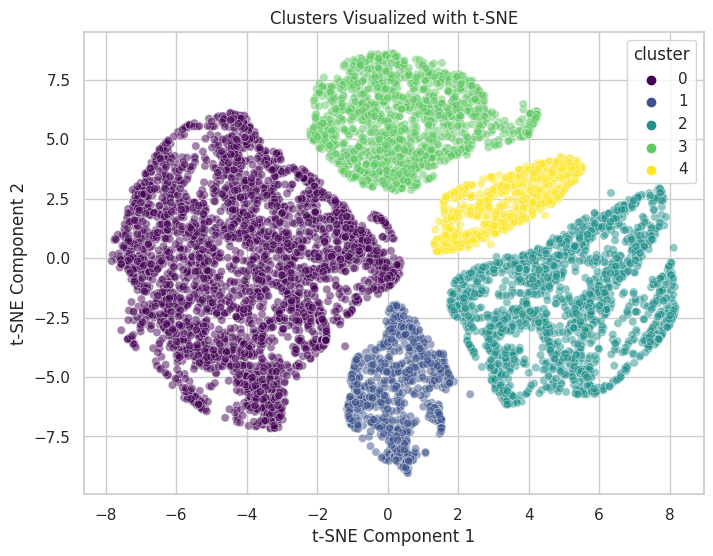

In [32]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = hier_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

# GaussianMixture

In [33]:
#Number of clusters (K)
n_clusters = 5

# Initialize the GaussianMixture model
gaussian_model = GaussianMixture(n_components=n_clusters,covariance_type='full')
labels_ = gaussian_model.fit_predict(df_copy)

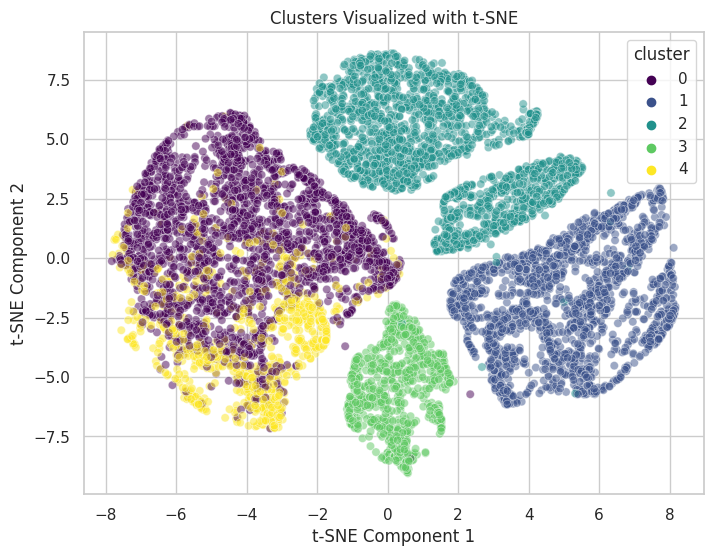

In [34]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis',alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

# DBSCAN

In [35]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(df_copy)

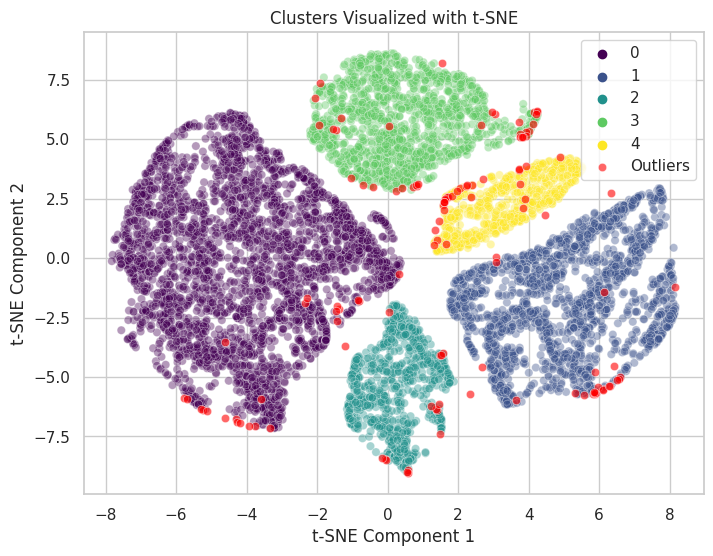

In [36]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = dbscan.labels_

outliers_mask = df_tsne['cluster'] == -1
df_tsne_without_outliers = df_tsne[~outliers_mask]

# Plot clusters with different colors
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_without_outliers, palette='viridis', alpha=0.4)

# Color outliers (cluster = -1) with a specific color
outliers_mask = df_tsne['cluster'] == -1
sns.scatterplot(x=df_tsne.loc[outliers_mask, 't-SNE Component 1'], 
                y=df_tsne.loc[outliers_mask, 't-SNE Component 2'], 
                color='red', 
                label='Outliers', 
                alpha=0.6)

plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

# As we can see `Hierarchical Clustering` has been identified as the most effective model for clustering customers.

In [37]:
final_df = df.copy()
final_df.dropna(inplace=True)
final_df.drop(columns=['CUST_ID'],inplace=True)
final_df['Cluster'] = hier_model.labels_

# Now we will Describe the business meaning for each cluster :-

In [38]:
# Define the columns and clusters
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']

clusters = final_df['Cluster'].unique()

num_rows = len(cols)
num_cols = len(clusters)

In [39]:
def Cluster_analysis(cluster_num):
    fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4*num_rows))

    # Loop through each feature
    for i, col in enumerate(cols):
        # Select data points belonging to the first cluster
        data = final_df[final_df['Cluster'] == cluster_num][col]

        # Plot histogram for the first cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i], stat='percent', color='skyblue', label='Histogram')
        axes[i].set_title(f'Cluster 0 - {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Percent')

        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i].axvline(mean_value, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}')

        # Create a boxplot on the same axes
        ax_box = axes[i].twinx()
        sns.boxplot(x=data, ax=ax_box, linewidth=1.0, color='salmon')

        axes[i].legend(loc='upper left')
        ax_box.legend(loc='lower right', labels=['Box Plot'])

    plt.tight_layout()
    plt.show()


## First Cluster :- 

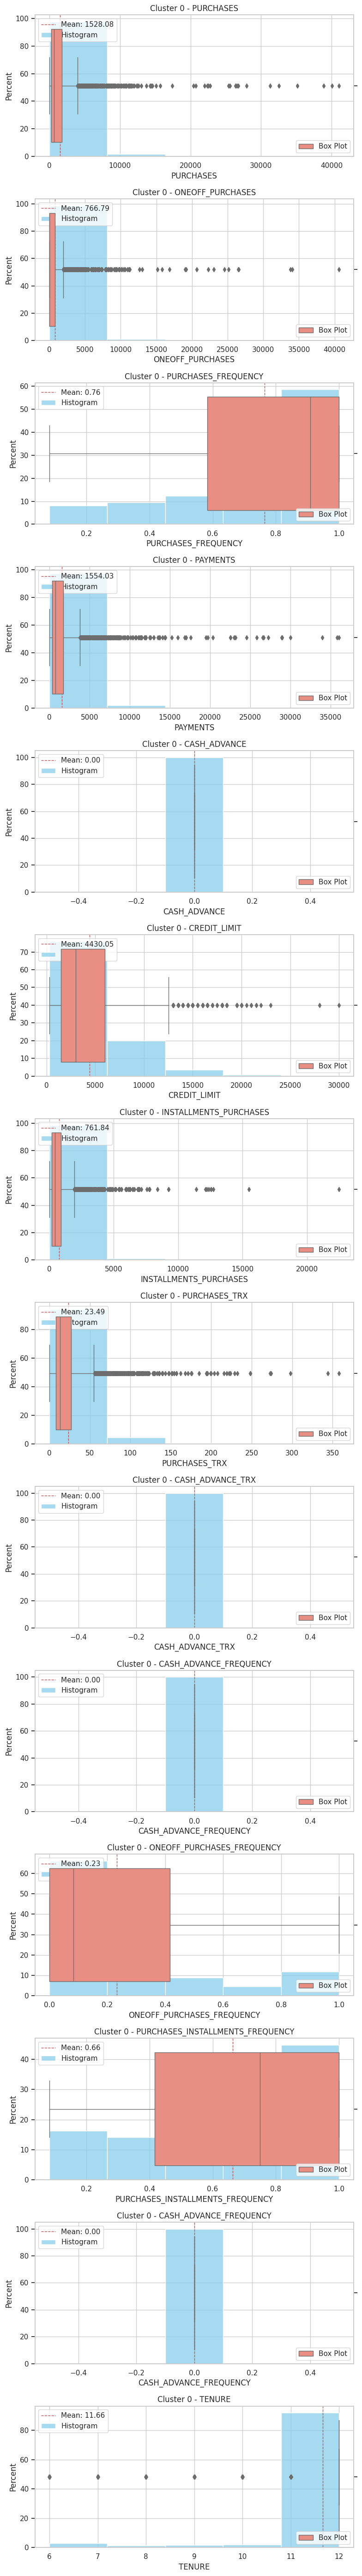

In [40]:
Cluster_analysis(0)

## business meaning for the first Cluster:-
### Cluster 0
**Customer Behavior Overview:**
Customers in Cluster 0 showcase a preference for making frequent and moderate-sized purchases primarily through installment payments rather than opting for cash advances.

**Purchase Behavior:**

Mean amount of purchases made in installments: $761.84, indicating a significant reliance on installment payments.

Average number of purchase transactions: Approximately 23, suggesting a consistent spending pattern.

76% of customers exhibit frequent purchase behavior, reflecting a steady and moderate spending habit.

Mean total purchases amount to $1528, indicating a balance between frequency and moderate spending.


## Second Cluster :- 

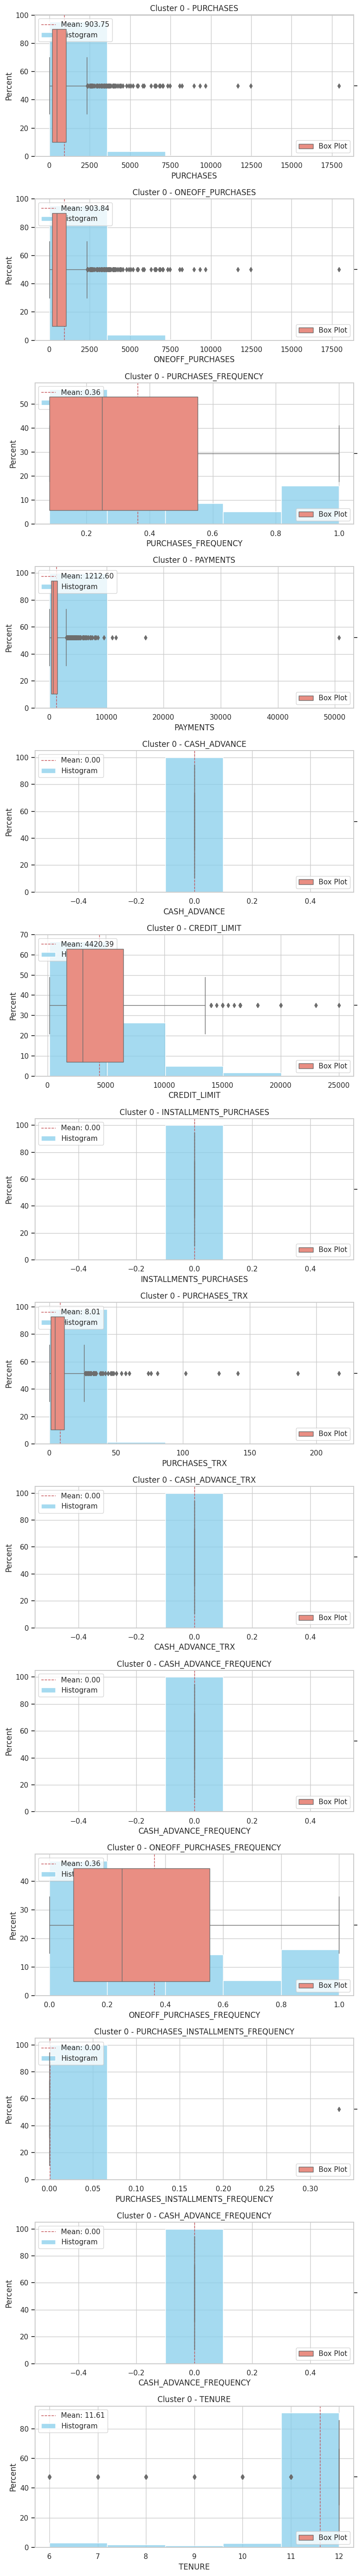

In [41]:
Cluster_analysis(1)

### Cluster 1
**Customer Behavior Overview:**
Customers in Cluster 1 exhibit a distinctive preference for one-off purchases over installment payments, with a moderate level of spending.

**Purchase Behavior:**
- Majority of purchases are one-off transactions, emphasizing lump-sum spending.
- Customers tend to avoid purchases in installments, preferring immediate payment.
- Average number of purchase transactions is approximately 8, indicating a more reserved spending activity.
- Mean total purchases amount to $903, reflecting a tendency for one-off transactions with moderate spending.

## Third Cluster :- 

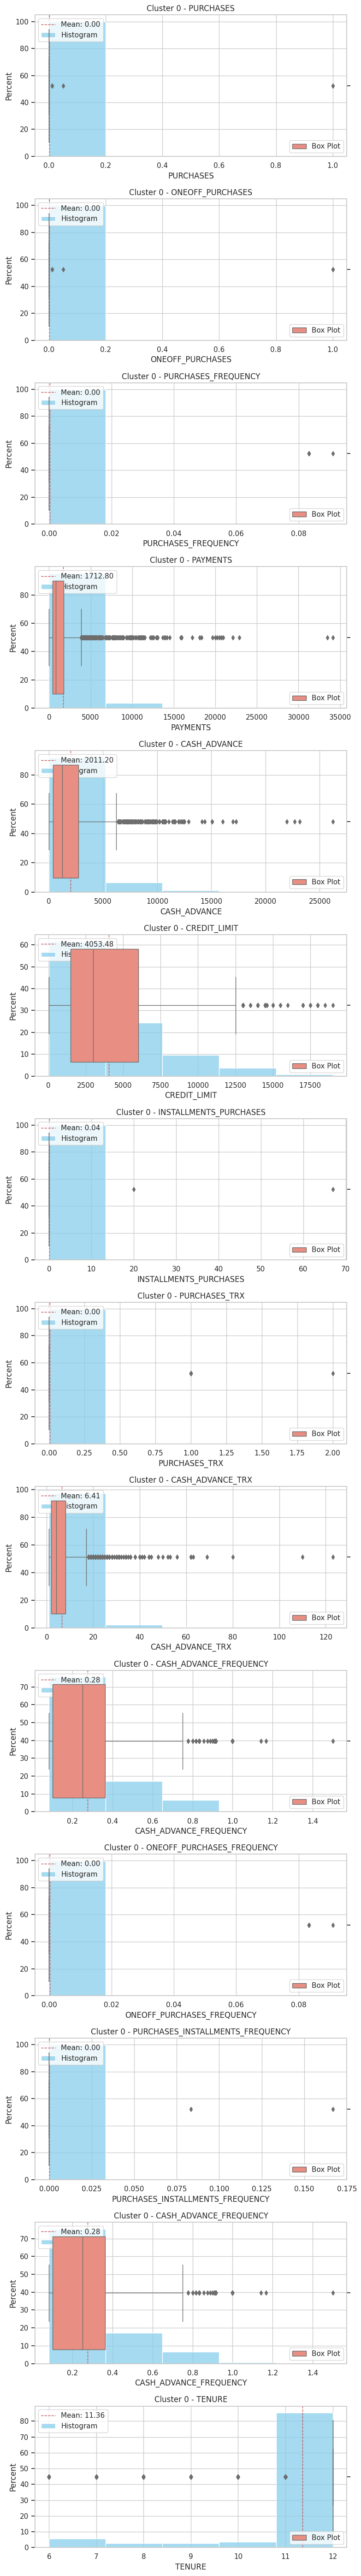

In [42]:
Cluster_analysis(2)

### Cluster 2
**Customer Behavior Overview:**
Customers in Cluster 2 display a preference for using cash advances as their primary spending method.

**Purchase Behavior:**
- Majority of purchases made through cash advances, indicating reliance on immediate funds.
- None of the customers exhibit frequent purchase behavior, suggesting rare or one-time spending.
- Mean amount of cash advances is $2011, showcasing reliance on meaningful immediate funds.


## Fourth Cluster :- 

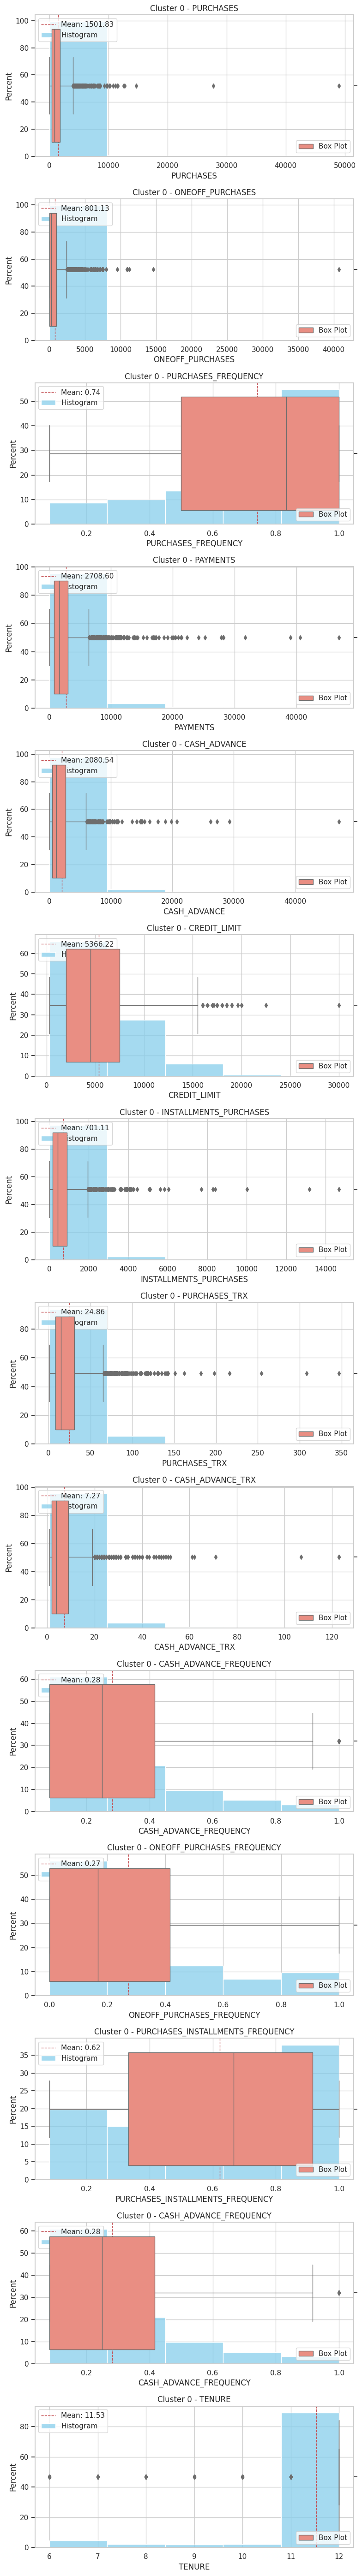

In [43]:
Cluster_analysis(3)

### Cluster 3
**Customer Behavior Overview:**
Customers in Cluster 3 exhibit a dual preference for making both installment purchases and cash advances, showcasing a versatile spending pattern.

**Purchase Behavior:**

 Mean amount of purchases made in installments: $701.84, indicating a significant reliance on installment payments.

 High number of purchase transactions, with an average of approximately 25, showcasing consistent spending.

 74% of customers exhibit frequent purchase behavior, reflecting a balanced and moderate spending habit.

 Mean total purchases amount to $1501, indicating a balance between frequency and moderate spending.
  
**Cash Advance:**
- Mean amount of cash advances taken is $2080.54, suggesting reliance on immediate funds for purchases.


## Fifth Cluster :- 

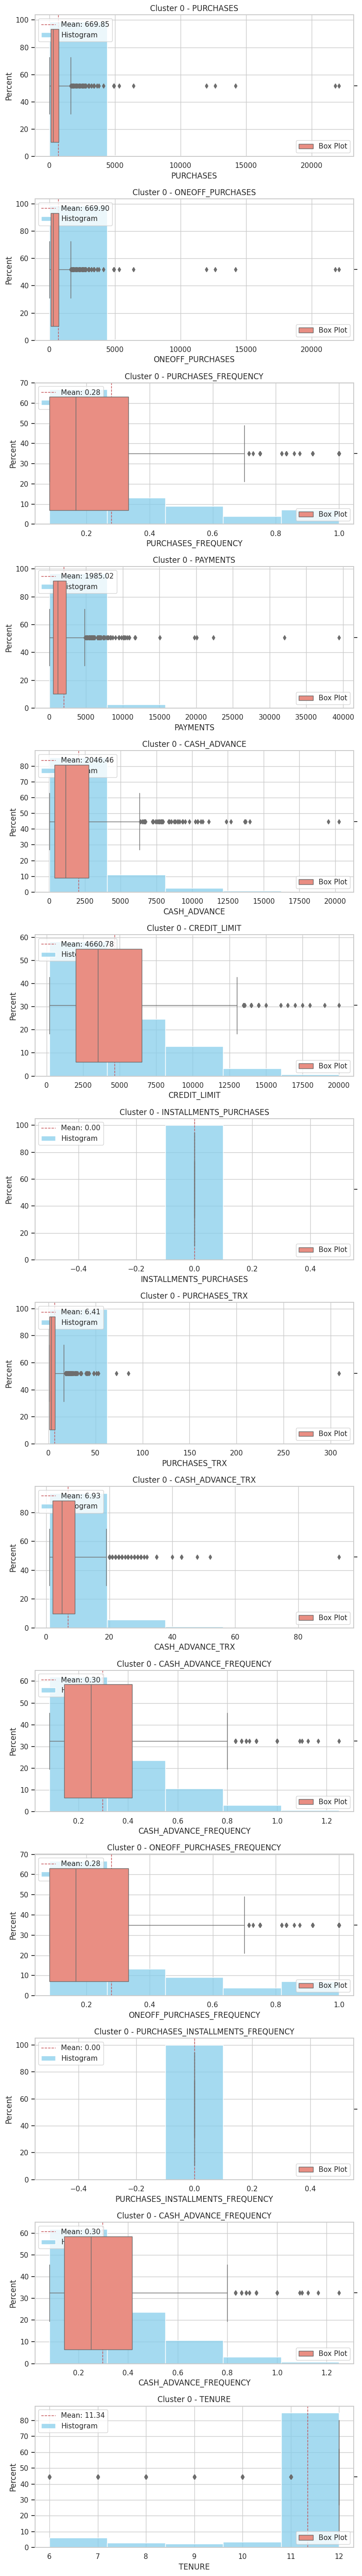

In [44]:
Cluster_analysis(4)

### Cluster 4
**Customer Behavior Overview:**
Customers in Cluster 4 demonstrate a preference for using cash advances as their primary spending method, with a moderate level of overall spending.

**Purchase Behavior:**
- Mean amount of purchases is $669, indicating a moderate level of spending on purchases.
- Customers tend to make fewer purchase transactions, with an average of approximately 6, suggesting a preference for rare spending or one-time purchases.
- 27% of customers exhibit frequent purchase behavior, indicating a preference for rare or one-time spending.

**Cash Advance:**
- Mean amount of cash advances taken is $2046.54, indicating a heavy reliance on cash advances for meeting financial needs.


## <a name="6">improvement ideas</a>


- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before 

# Applying PCA 


In [ ]:
# Principal Component Analysis (PCA): Projects data onto a lower-dimensional space using orthogonal transformations.

In [45]:
pca = PCA(n_components=.95)
pca_result = pca.fit_transform(df_copy)

print('Explained variation summation for all components: {}'.format(sum(pca.explained_variance_ratio_)))

Explained variation summation for all components: 0.9662551582368192


In [46]:
pca_result.shape

(8636, 5)

In [47]:
def pick_random_color():
    return '#'+str(np.random.randint(100000, 999999))

# Elbow Method After PCA

In [48]:
wss = []
K = range(2,21)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_result)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

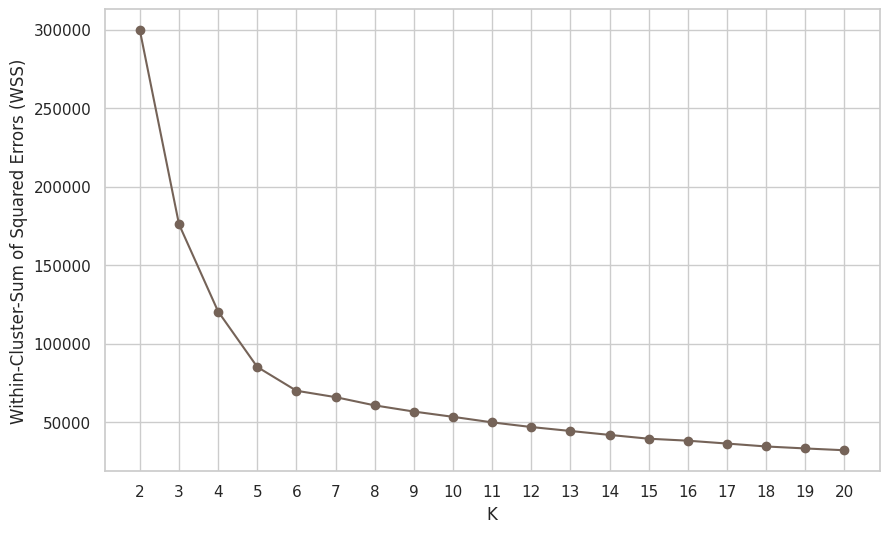

In [49]:
plt.figure(figsize=(10,6))
plt.plot(K,wss, marker = 'o', c = pick_random_color())
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.xticks(K);

# From the graph, found the best number of clusters is 6 (using elbow method)

In [50]:
kmeans = KMeans(n_clusters=6 ,init="k-means++")
kmeans = kmeans.fit(pca_result)

Clusters = kmeans.labels_
Clusters

array([1, 0, 3, ..., 1, 0, 4], dtype=int32)

In [51]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(pca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.006s...
[t-SNE] Computed neighbors for 8636 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.406604
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.747261
[t-SNE] KL divergence after 2000 iterations: 0.871262


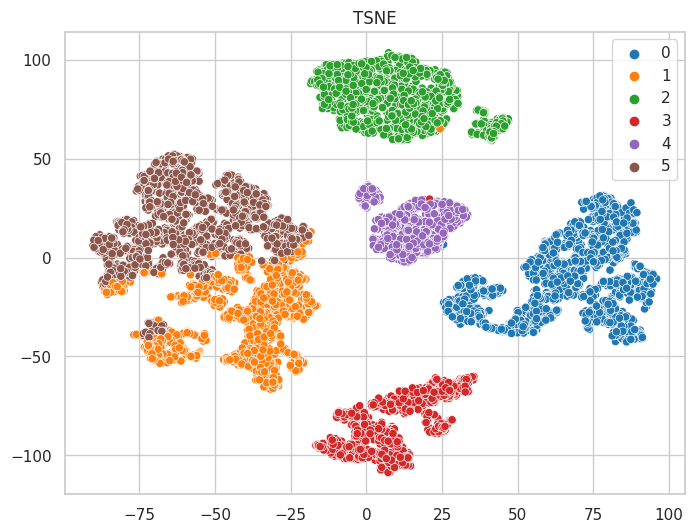

In [52]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

# Lets to see With five like above without pca

## with K-means labels 

In [53]:
kmeans = KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(pca_result)

Clusters = kmeans.labels_
Clusters

array([0, 1, 3, ..., 0, 1, 4], dtype=int32)

In [54]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(pca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.007s...
[t-SNE] Computed neighbors for 8636 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.406604
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.747261
[t-SNE] KL divergence after 2000 iterations: 0.871262


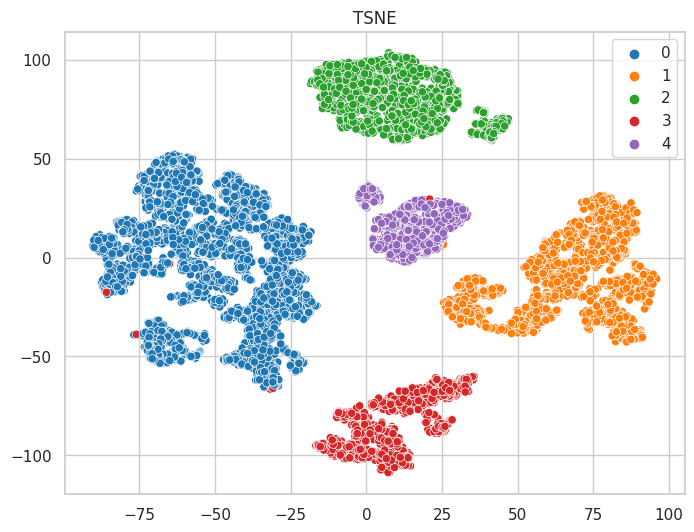

In [55]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

# With Hierarchial Clustering labels after PCA was the best like above without PCA :-

In [56]:
# Number of clusters (K)
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(pca_result)

AgglomerativeClustering(n_clusters=5)

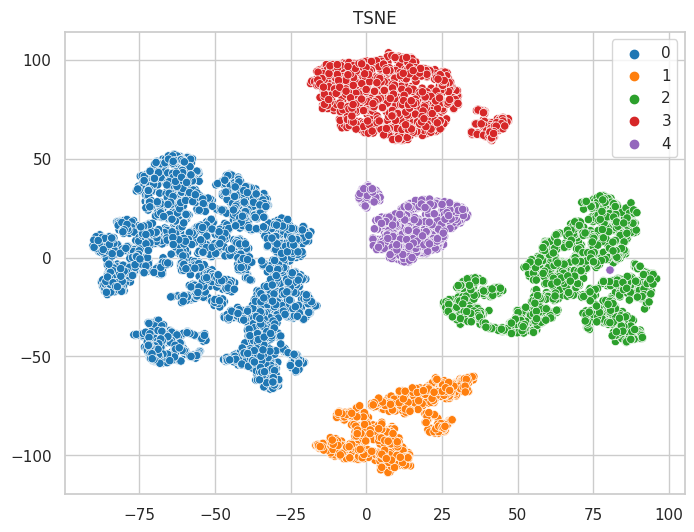

In [57]:
# Add the cluster information to the reduced data
cluster = hier_model.labels_

sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=cluster,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

# With PCA Almost the same to without PCA

In [58]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel='poly', n_components=6)
kpca_result = kpca.fit_transform(df_copy)

In [59]:
kmeans = KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(kpca_result)

Clusters = kmeans.labels_
Clusters

array([4, 2, 4, ..., 4, 4, 4], dtype=int32)

In [60]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(kpca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.007s...
[t-SNE] Computed neighbors for 8636 samples in 0.279s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 6.437032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.515236
[t-SNE] KL divergence after 2000 iterations: 0.846774


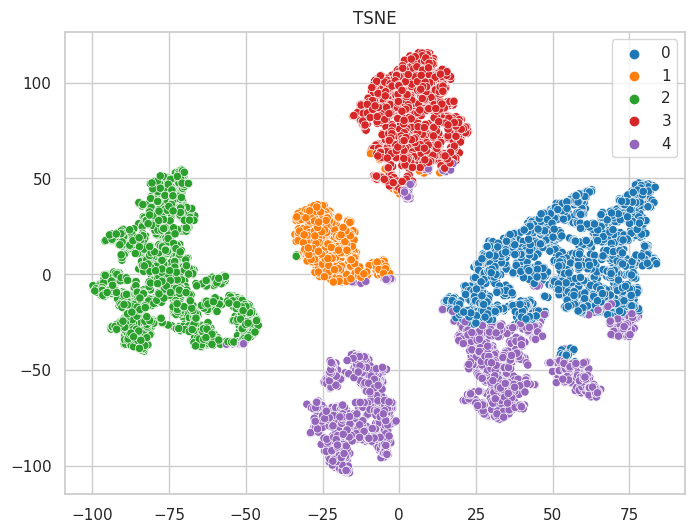

In [61]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

# Now we will start Gap Analysis :-

In [62]:
!pip install gap-stat

  Installing build dependencies ... - \ | / - \ | / - \ | done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=7fa26574e533eed719e0aa810b9860cc6b1a23ba55b4b7b4bbbac7bafbbda3ff
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [63]:
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_copy, cluster_array=np.arange(1, 11))

print(f'Optimal number of clusters: {n_clusters}')

Optimal number of clusters: 10


Optimal number of clusters: 10


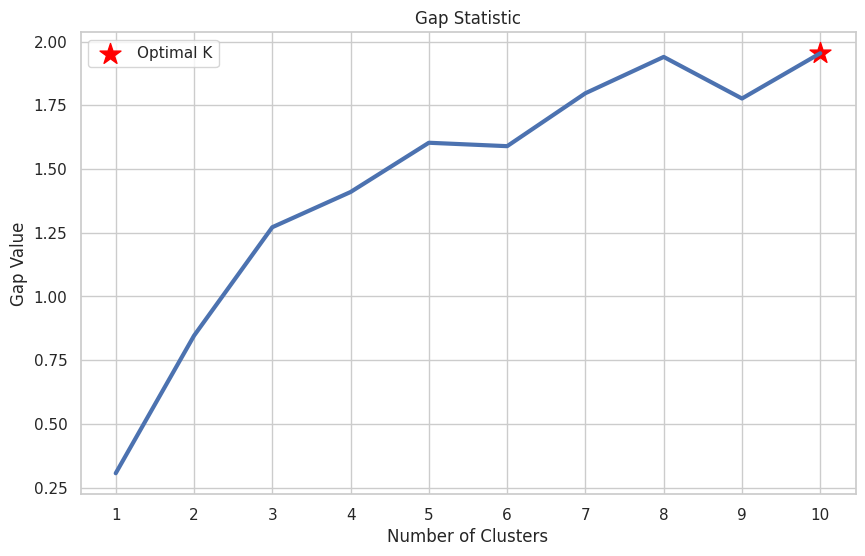

In [64]:
print(f'Optimal number of clusters: {n_clusters}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), optimalK.gap_df.gap_value, linewidth=3, color='b')
plt.scatter(n_clusters, optimalK.gap_df.loc[n_clusters-1, 'gap_value'], s=250, c='red', marker='*', label='Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.title('Gap Statistic')
plt.xticks(np.arange(1, 11))
plt.legend()
plt.grid(True)
plt.show()

# Cluster Analysis using KMeans Algorithm and t-SNE Visualization

### Optimal Number of Clusters: 10




#### Applying KMeans Algor

In [65]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_copy)
labels = kmeans.labels_
df_copy['label'] = labels

In [66]:
# Number of clusters (K)
n_clusters = 10

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy)

AgglomerativeClustering(n_clusters=10)

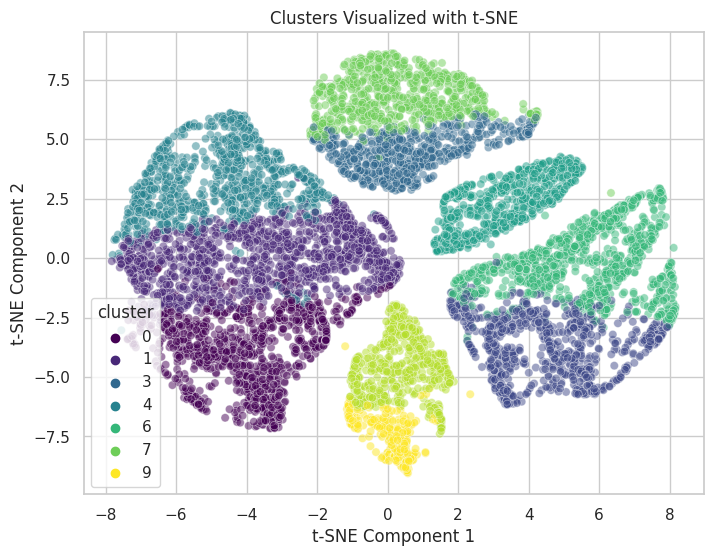

In [67]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = hier_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## The gap Analysis gives the best is 10 clusters , after I visualized it I think Five is better than 10 in clustring 
